# Анализ пространственных данных. Домашнее задание №2

Мягкий дедлайн: __4 ноября 2020 г. 23:59__

Жесткий дедлайн (со штрафом в _50%_ от количества набранных вами за ДЗ баллов): __5 ноября 2020 г. 08:59__

Визуализация "чего-либо" __без__ выполненного основного задания оценивается в __0 баллов__

ФИО: `Алехин Семен Юрьевич`

Группа: `MADE-DS-12`

## Задание №1. Горячая точка (алгоритм - 10 баллов, визуализация - 10 баллов).

Генерируйте рандомные точки на планете Земля до тех пор, пока не попадете на территорию ``Афганистана``

1. Вы можете использовать функции принадлжености точки полигону и расстояния от точки до полигона (в метрах)
2. Предложите не наивный алгоритм поиска (генерировать __напрямую__ точку из полигона границ Афганистана __запрещено__)

In [1]:
from openrouteservice import client
import folium
from shapely.geometry import LineString, Polygon, mapping, Point
from shapely.ops import cascaded_union
import time

def style_function(color): # To style data
    return lambda feature: dict(color=color,
                                opacity=0.5,
                                weight=4,)

In [2]:
mapa = folium.Map()

In [3]:
afganistan = folium.GeoJson('afgan.json')


In [4]:
afganistan.add_to(mapa)

In [5]:
mapa

In [6]:
dafg = afganistan.data

In [7]:
poly = Polygon(dafg.get('features')[0]['geometry']['coordinates'][0][0])

In [8]:
from random import uniform 

In [9]:
k = 0
randpoint = Point(0, 0)
while randpoint.within(poly) != True:
    x, y = uniform(-90,90), uniform(-180,180)
    randpoint = Point(y, x)
    folium.Marker(
        location=[x, y]
    ).add_to(mapa)
    k = k + 1
print(x,y)

33.207250709615806 61.740675085293134


In [10]:
mapa

Визуализируйте пошагово предложенный алгоритм при помощи ``Folium``

## Задание №2. Качество жизни (20 баллов).

Для измерения показателя качества жизни в точке, найденной в предыдущем задании, вам необходимо рассчитать следующую сумму расстояний (в метрах):

1. Расстояние от точки до 5 ближайших __*__ банкоматов, находящихся в стране с наибольшим количеством объектов жилой недвижимости
2. Расстояние от точки до 5 ближайших школ, находящихся в стране с наибольшим количеством аптек в столице
3. Расстояние от точки до 5 ближайших кинотеатров, наодящихся в стране с самым большим отношением числа железнодорожных станций к автобусным остановкам в южной части __**__

__*__ При поиске _N_ ближайших объектов обязательно использовать ``R-tree``

__**__ Южной частью страны является территория, находящаяся к югу от множества точек, равноудаленных от самой северной и самой южной точек страны

In [11]:
# put your code here

## Задание №3. Поездка по Нью-Йорку (маршрут - 20 баллов, визуализация - 10 баллов).

Добраться __на автомобиле__ от входа в ``Central Park`` __Нью-Йорка__ (со стороны ``5th Avenue``) до пересечения ``Water Street`` и ``Washington Street`` в Бруклине (откуда получаются лучшие фото Манхэттенского моста) довольно непросто - разумеется, из-за вечных пробок. Однако еще сложнее это сделать, проезжая мимо школ, где дети то и дело переходят дорогу в неположенном месте.

Вам необходимо построить описанный выше маршрут, избегая на своем пути школы. Визуализируйте данный маршрут (также добавив школы и недоступные для проезда участки дорог) при помощи ``Folium``

Данные о расположении школ Нью-Йорка можно найти [здесь](https://catalog.data.gov/dataset/2019-2020-school-point-locations)

In [12]:
# Points in New York From A to B
ayork = [ -73.963889, 40.777078]
byork = [-73.98952737592285, 40.70320646629555]


In [13]:
map_berlin = folium.Map() # Create map

In [14]:
# Coordinates schools
import pandas as pd
df = pd.read_csv('School_Point_Locations.csv')
schoolyork = []

for i in df['the_geom']:
    tmp = []
    tmp.append(float((i.strip('POINT ()').split()[0])))
    tmp.append(float((i.strip('POINT ()').split()[1])))
    schoolyork.append(tmp)

In [15]:
#middle A and B 
o = Point((ayork[0]+byork[0]) / 2, (ayork[1]+byork[1]) / 2)
r = Polygon(o.buffer(0.045))

In [16]:
# take some points in radius 
#byorkbuf = Point(byork[0], byork[1]).buffer(0.042)    
#schoolradius = Polygon(byorkbuf)
schoolyork2 = []
for i in schoolyork:
    if Point(i[0],i[1]).within(r):
        schoolyork2.append(i)
        
    

In [17]:
# cnt schools in radius from all(1992)
len(schoolyork2)

238

In [18]:
d = [ ] #folium schools
dd = [ ] # sheply geo schools
k = 0
for i in schoolyork2:
    buf = Point(i[0], i[1]).buffer(0.001)
    ttmp = folium.GeoJson(buf).add_to(map_berlin)
    ttmp2 = Polygon(buf)
    d.append(ttmp)
    dd.append(ttmp2)
    k = k + 1

In [19]:
# Basic parameters
api_key = '5b3ce3597851110001cf624806c98f157d64455482e6b9723136d63a' #https://openrouteservice.org/sign-up
clnt = client.Client(key=api_key)



popup_route = "<h4>{0} route</h4><hr>" \
             "<strong>Duration: </strong>{1:.1f} mins<br>" \
             "<strong>Distance: </strong>{2:.3f} km" 

# coordinates of Points in New York From A to B
coordinates = [ayork, byork]
direction_params = {'coordinates': coordinates,
                    'profile': 'driving-car', 
                    'format_out': 'geojson',
                    'preference': 'shortest',
                    'geometry': 'true'}

regular_route = clnt.directions(**direction_params) # Direction request

# Build popup
duration, distance = regular_route['features'][0]['properties']['summary'].values()
popup = folium.map.Popup(popup_route.format('Regular', 
                                                 duration/60, 
                                                 distance/1000))

gj= folium.GeoJson(regular_route,
                   name='Regular Route',
                   style_function=style_function('blue')) \
          .add_child(popup)\
          .add_to(map_berlin)

folium.Marker(list(reversed(coordinates[0])), popup='Bundeskanzleramt').add_to(map_berlin)
folium.Marker(list(reversed(coordinates[1])), popup='Deutsches Currywurst Museum').add_to(map_berlin)

In [20]:

union_buffer = cascaded_union(dd)


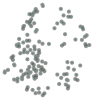

In [21]:
union_buffer

In [22]:
# New routing with avoided streets
diesel_request = {'coordinates': coordinates, 
                'format_out': 'geojson',
                'profile': 'driving-car',
                'preference': 'shortest',
                'instructions': False,
                 'options': {'avoid_polygons': mapping(union_buffer)}} 
route_diesel = clnt.directions(**diesel_request)

# Build popup
distance, duration = route_diesel['features'][0]['properties']['summary'].values()
popup = folium.map.Popup(popup_route.format('Diesel Route',
                                                 duration/30,
                                                 distance/1000))

folium.GeoJson(route_diesel,
               style_function=style_function('black'),    # black is route without school
               ).add_child(popup).add_to(map_berlin)

map_berlin.add_child(folium.map.LayerControl())